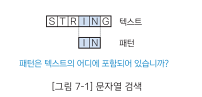

## 브루트 포스법

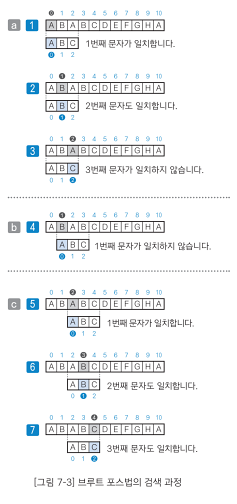

#### 실습 7-1

In [1]:
# 선형 검색을 단순하게 확장한 알고리즘 => 단순법이라고도 함

def bf_match(txt : str, pat : str) -> int:
    pt = 0 # txt 를 따라가는 커서
    pp = 0 # pat 를 따라가는 커서

    while pt != len(txt) and pp != len(pat):
        if txt[pt] == pat[pp]:
            pt += 1
            pp += 1
        else :
            pt = pt - pp + 1
            pp = 0
    
    return pt - pp if pp == len(pat) else -1

#### 멤버십 연산자와 표준 라이브러리를 사용한 문자열 검색

In [10]:
txt = 'apple'
ptn = 'ape'
print(ptn in txt)
print(ptn not in txt)

False
True


In [11]:
txt = 'apple'
ptn = 'app'
print(ptn in txt)
print(ptn not in txt)

True
False


#### str 클래스형에 소속된 find(), index()

In [23]:
# find()
txt = 'apple'
ptn = 'app'
start = 0
end = -1
txt.find(ptn[start:end])
# txt의 [start:end] 에 sub가 포함되면 그 가운데 가장 작은 인덱스를 리턴하고, 그렇지 않으면 -1을 리턴

0

In [24]:
txt = 'apple'
ptn = 'app'
print(txt.find(ptn))
print(txt.find(ptn[0:]))
print(txt.find(ptn[:3]))
# start, end 는 생략이 가능하다

0
0
0


In [28]:
# index()

txt = 'apple'
ptn = 'app'
txt.index(ptn)
# find() 함수와 동일한 기능을 수행하나,

0

In [29]:
txt = 'apple'
ptn = 'ape'
txt.index(ptn)
# 발견되지 않으면 예외처리로 ValueError를 내보낸다.

ValueError: ignored

#### with 계열 함수

In [32]:
txt = 'apple'
print(txt.startswith('a'))
print(txt.startswith('b'))

True
False


In [33]:
print(txt.endswith('e'))
print(txt.endswith('f'))

True
False


## KMP법

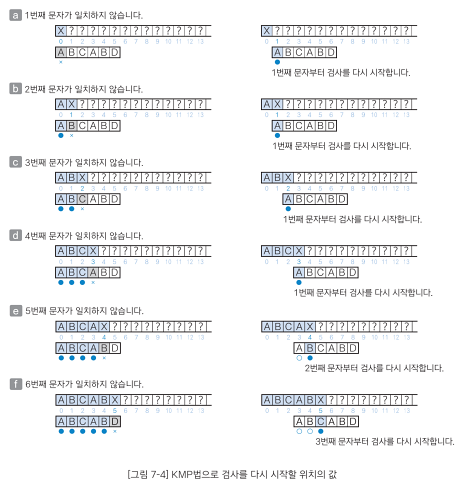

In [34]:
# 일치하지 않는 문자를 만나면 이전 단계에서 검사했던 결과를 버리는 브루트 포스법과 달리
# 검사했던 결과를 버리지 않고 효율적으로 활용한다.
# 알고리즘이 복잡할 뿐 보이어-무어법보다 성능면에서 같거나 낮아 실제 별로 사용하지 않음

def kmp_match(txt : str, pat : str) ->int:
    pt = 1 # txt 커서
    pp = 0 # pat 커서

    # 건너뛰기 표 만들기
    skip[pt] = 0
    while pt != len(pat):
        if pat[pt] == pat[pp]:
            pt += 1
            pp += 1
            skip[pt] = pp
        elif pp == 0:
            pt += 1
            skip[pt] = pp
        else:
            pp = skip[pp]
        
    pt = pp = 0
    while pt != len(txt) and pp != len(pat):
        if txt[pt] == pat[pp]:
            pt += 1
            pp += 1
        elif pp == 0:
            pt += 1
        else :
            pp = skip[pp]
    
    return pt - pp if pp == len(pat) else -1

## 보이어-무어법

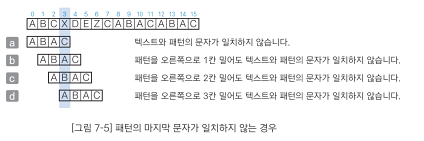

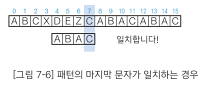

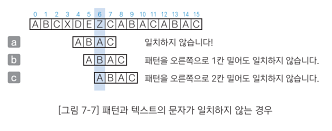

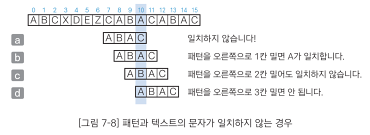

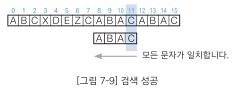

In [ ]:
# 패턴의 끝문자에서 시작하여 앞쪽을 향해 검사를 수행한다.
# 이 과정에서 일치하지 않는 문자를 발견하면 미리 준비한 표를 바탕으로 패턴이 이동하는 값을 결정한다.


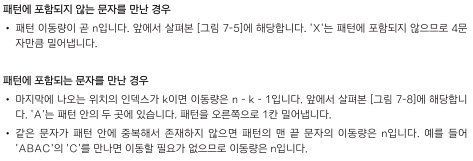

In [35]:
def bm_match(txt : str, pat : str) -> int:

    skip = [None] *256

    for pt in range(256):
        skip[pt] = len(pat)
    
    for pt in range(len(pat)):
        skip[ord(pat[pt])] = len(pat) - pt - 1
    

    while pt < len(txt):
        pp = len(pat) - 1
        while txt[pt] == pat[pp]:
            if pp == 0:
                return pt
            pt -= 1
            pp -= 1
        
        pt += skip[ord(txt[pt])] if skip[ord(txt[pt])] > len(pat) - pp else len(pat) - pp
    
    return -1

#### 파이썬에서 문자열 검색은 일반적으로 표준 라이브러리를 사용한다. <br> 만약 표준 라이브러리를 사용하지 않는다면<br> 보이어-무어법이나 상황에 따라서 부르트 포스법을 사용하는 경우가 많다.

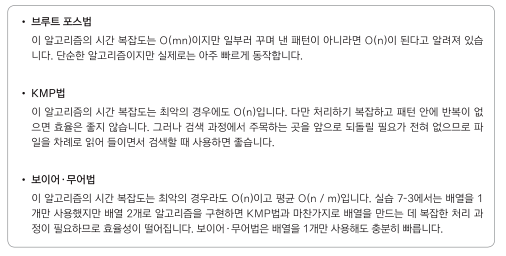